In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
countries_df = pd.read_csv("./data/process_data/countries.csv")
countries_df.head()

,country_name,capital_city,region,subregion,population,area,languages,timezones,density
0,South Georgia,King Edward Point,Antarctic,Unknown,30,3903.0,English,UTC-02:00,0.007686
1,Grenada,St. George'S,Americas,Caribbean,112519,344.0,English,UTC-04:00,327.090116
2,Switzerland,Bern,Europe,Western Europe,8654622,41284.0,"French, Swiss German, Italian, Romansh",UTC+01:00,209.636227
3,Sierra Leone,Freetown,Africa,Western Africa,7976985,71740.0,English,UTC,111.192989
4,Hungary,Budapest,Europe,Central Europe,9749763,93028.0,Hungarian,UTC+01:00,104.804607


### 1. Descriptive Statistics
Objective: Get an overview of the data with key statistics

In [3]:
# Generate descriptive statistics
statistics = countries_df.describe(include='all')
print(statistics)

         country_name capital_city  region  subregion    population  \
count             250          250     250        250  2.500000e+02   
unique            250          246       6         25           NaN   
top     South Georgia      Unknown  Africa  Caribbean           NaN   
freq                1            4      59         28           NaN   
mean              NaN          NaN     NaN        NaN  3.111089e+07   
std               NaN          NaN     NaN        NaN  1.296673e+08   
min               NaN          NaN     NaN        NaN  0.000000e+00   
25%               NaN          NaN     NaN        NaN  2.210995e+05   
50%               NaN          NaN     NaN        NaN  4.912244e+06   
75%               NaN          NaN     NaN        NaN  1.902577e+07   
max               NaN          NaN     NaN        NaN  1.402112e+09   

                area languages  timezones       density  
count   2.500000e+02       250        250    250.000000  
unique           NaN       141 

### 2. Data Visualization
Objective: Visualize key attributes such as population and area.

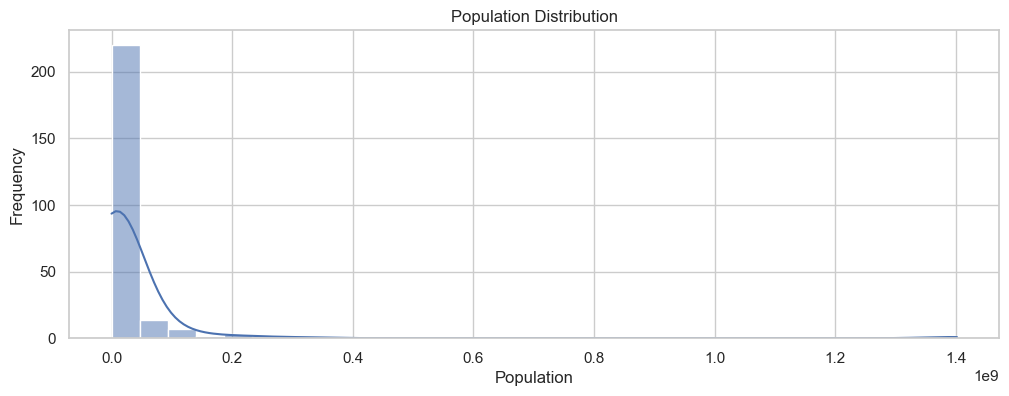

In [4]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histogram of Population
plt.figure(figsize=(12, 4))
sns.histplot(countries_df['population'], bins=30, kde=True)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.savefig('./images/population_distribution.png')  # Save the figure as a PNG file
plt.show()

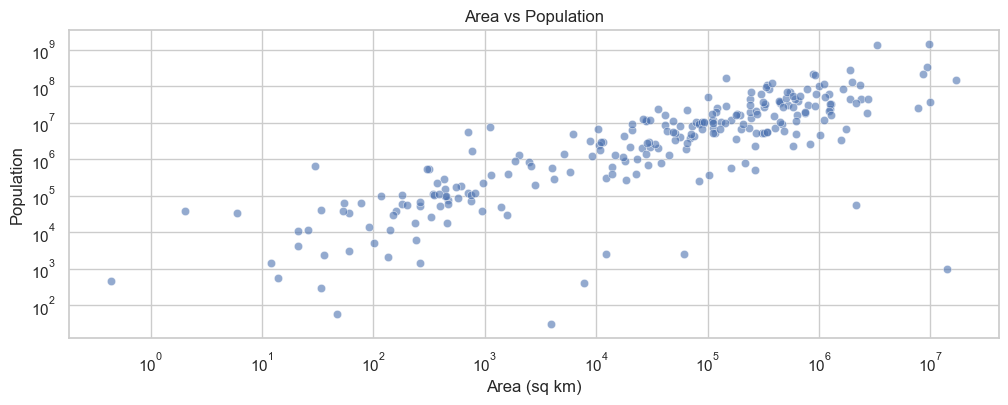

In [5]:
# Scatter plot of Area vs Population
plt.figure(figsize=(12, 4))
sns.scatterplot(data=countries_df, x='area', y='population', alpha=0.6)
plt.title('Area vs Population')
plt.xlabel('Area (sq km)')
plt.ylabel('Population')
plt.xscale('log')  # Log scale for better visibility
plt.yscale('log')  # Log scale for better visibility
plt.savefig('./images/area_population.png')  # Save the figure as a PNG file
plt.show()

### 3. Correlation Analysis
Objective: Analyze the correlation between population and area.

            population     area
population     1.00000  0.40324
area           0.40324  1.00000


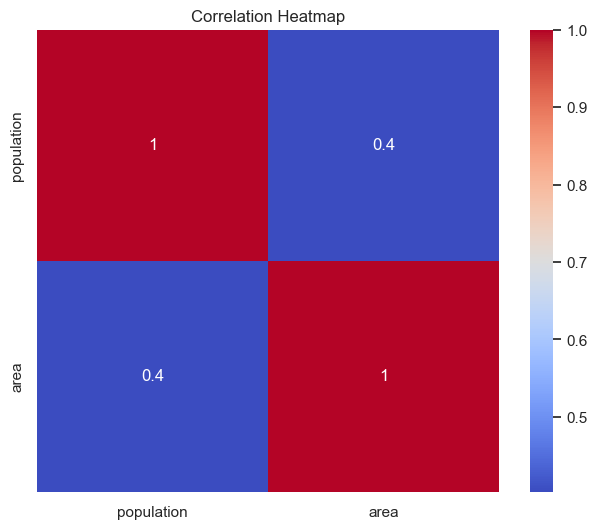

In [6]:
# Correlation matrix
correlation = countries_df[['population', 'area']].corr()
print(correlation)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig('./images/correlation_heatmap.png')  # Save the figure as a PNG file
plt.show()

### 4. Group By Analysis
Objective: Analyze average population and area by region.

      region    population          area
0     Africa  2.308636e+07  5.138715e+05
1   Americas  1.823172e+07  7.513915e+05
2  Antarctic  2.860000e+02  2.802422e+06
3       Asia  9.209190e+07  6.427628e+05
4     Europe  1.409310e+07  4.355528e+05
5    Oceania  1.597016e+06  3.153820e+05


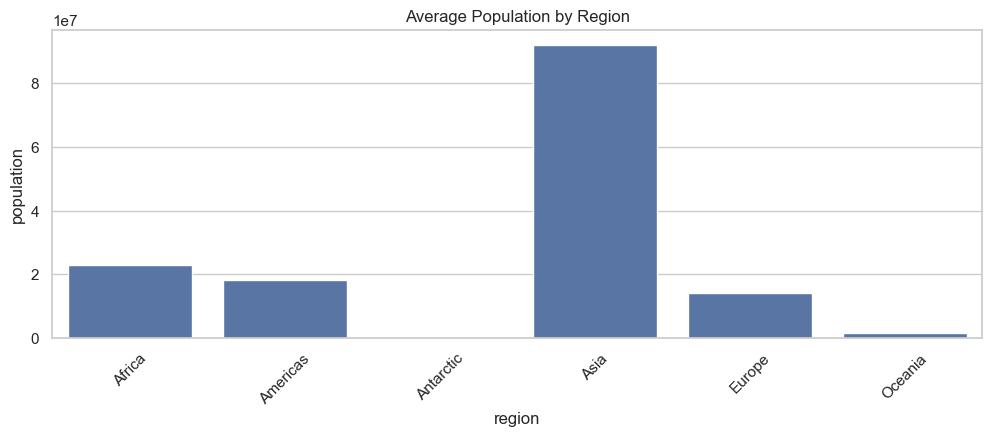

In [7]:
# Group by region and calculate average population and area
region_stats = countries_df.groupby('region').agg({
    'population': 'mean',
    'area': 'mean'
}).reset_index()

print(region_stats)

# Bar plot of average population by region
plt.figure(figsize=(12, 4))
sns.barplot(data=region_stats, x='region', y='population')
plt.title('Average Population by Region')
plt.xticks(rotation=45)
plt.savefig('./images/avg_population_by_region.png')  # Save the figure as a PNG file
plt.show()

### 5. Density Analysis
Objective: Calculate population density and visualize it.

count      250.000000
mean       421.636109
std       1974.553563
min          0.000000
25%         29.771935
50%         83.930579
75%        225.354362
max      21644.733333
Name: density, dtype: float64


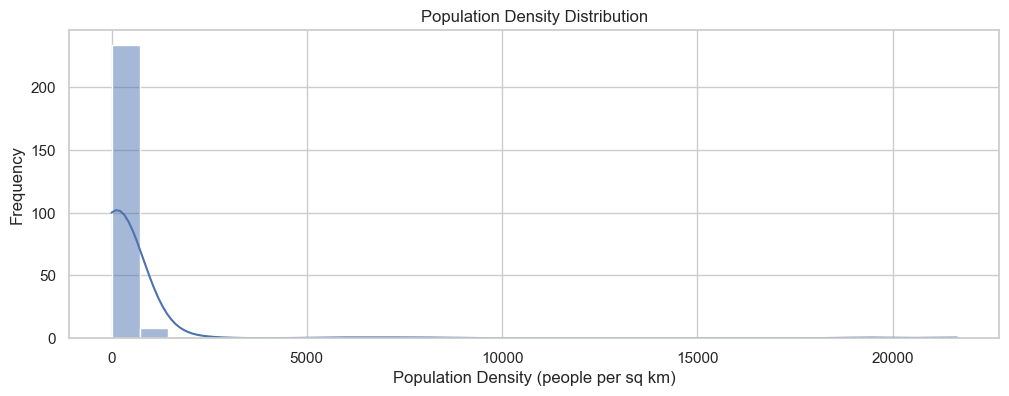

In [8]:
# Calculate population density
countries_df['density'] = countries_df['population'] / countries_df['area']

# Summary statistics for density
print(countries_df['density'].describe())

# Histogram of Population Density
plt.figure(figsize=(12, 4))
sns.histplot(countries_df['density'], bins=30, kde=True)
plt.title('Population Density Distribution')
plt.xlabel('Population Density (people per sq km)')
plt.ylabel('Frequency')
plt.savefig('./images/population_density_distribution.png')  # Save the figure as a PNG file
plt.show()

### 6. Top N Analysis
Objective: Find the top N countries by population or area.

In [9]:
# Top 10 countries by population
top_population = countries_df.nlargest(10, 'population')
print(top_population[['country_name', 'population']])

# Top 10 countries by area
top_area = countries_df.nlargest(10, 'area')
print(top_area[['country_name', 'area']])

      country_name  population
28           China  1402112000
85           India  1380004385
203  United States   329484123
13       Indonesia   273523621
74        Pakistan   220892331
222         Brazil   212559409
214        Nigeria   206139587
40      Bangladesh   164689383
104         Russia   144104080
24          Mexico   128932753
      country_name        area
104         Russia  17098242.0
66      Antarctica  14000000.0
108         Canada   9984670.0
28           China   9706961.0
203  United States   9372610.0
222         Brazil   8515767.0
131      Australia   7692024.0
85           India   3287590.0
124      Argentina   2780400.0
193     Kazakhstan   2724900.0
